<a href="https://colab.research.google.com/github/LightAxe/oregon-covid-visualizations/blob/main/oregon-covid-visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Look at this:  https://github.com/briancpark/COVID-19-Visualizations/blob/master/COVID19%20Visualizations.ipynb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
all_counties = pd.read_csv(url, dtype={"fips": str})
all_counties.date = pd.to_datetime(all_counties.date)

In [ ]:
def calc_daily_diff(county):
  dframe = county
  dframe['delta'] = county['cases'] - county['cases'].shift(1, fill_value=0)
  return dframe

In [ ]:
def get_state(state_name, df):
  state = df.loc[df['state'] == state_name]
  return state

In [ ]:
def get_oregon(all_counties):
  oregon = get_state('Oregon', all_counties)
  return oregon

In [ ]:
def get_county_pops():
  counties_url = 'http://rob.axpr.net/oregoncounties.csv'
  counties = pd.read_csv(counties_url, dtype={"CTYNAME": str})
  counties["CTYNAME"] = counties["CTYNAME"].str.split(" ", n = 1, expand = True) 
  counties.drop(labels="GrowthRate", axis=1, inplace=True)
  counties.rename(columns={"CTYNAME": "county", "pop2020": "population"}, errors="raise", inplace=True)
  return counties

In [ ]:
def get_county(county_name, df):
  county = df.loc[df['county'] == county_name]
  county = calc_daily_diff(county)
  county.drop(labels=['state','cases','deaths','fips'], axis=1, inplace=True)
  county['report_date'] = county['date']
  county.set_index('date', inplace=True)

  county_pops = get_county_pops()
  
  county = pd.merge(county, county_pops, on = 'county', how = 'left')
  return county

In [ ]:
def get_polk(oregon):
  polk = get_county('Polk', oregon)
  return polk

In [ ]:
def calc_cases_per_100k(county):
  county['rolling_14'] = county['delta'].rolling(min_periods=1, window=14).sum()
  county['rolling_14_per'] = county['rolling_14'] / county['population'] * 100000
  return county

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,county,delta,report_date,population,rolling_14,rolling_14_per,distance_learning,onsite_and_distance,transition
217,Malheur,16,2020-11-03,31255,150.0,479.923212,200,50,100
218,Malheur,11,2020-11-04,31255,153.0,489.521677,200,50,100
219,Malheur,17,2020-11-05,31255,152.0,486.322188,200,50,100
220,Malheur,16,2020-11-06,31255,155.0,495.920653,200,50,100
221,Malheur,15,2020-11-07,31255,158.0,505.519117,200,50,100


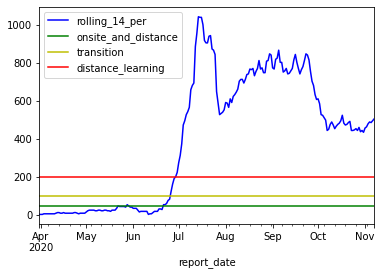

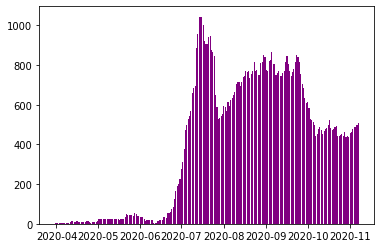

In [ ]:
oregon = get_state('Oregon', all_counties)

polk = get_county('Malheur', oregon)

polk = calc_cases_per_100k(polk)
polk['distance_learning'] = 200
polk['onsite_and_distance'] = 50
polk['transition'] = 100

polk.plot(y = ['rolling_14_per','onsite_and_distance','transition','distance_learning'], color=['b','g','y','r'], x = 'report_date')

fig, ax = plt.subplots()

# Add x-axis and y-axis
ax.bar(polk['report_date'],
       polk['rolling_14_per'],
       color='purple')

polk.tail()

In [ ]:
oregon = get_state('Oregon', all_counties)
oregon.head()
#dframe['delta'] = county['cases'] - county['cases'].shift(1, fill_value=0)
oregon.set_index('date', inplace=True)
oregon.sort_values('county', inplace=True)
oregon['delta'] = oregon.groupby(['state','county'])['cases'].shift(1, fill_value=0)
oregon.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,state,fips,cases,deaths,delta
date,,,,,,
2020-07-17,Yamhill,Oregon,41071,222,9,220
2020-07-18,Yamhill,Oregon,41071,229,9,222
2020-07-19,Yamhill,Oregon,41071,235,9,229
2020-07-01,Yamhill,Oregon,41071,126,8,235
2020-11-07,Yamhill,Oregon,41071,1148,15,126


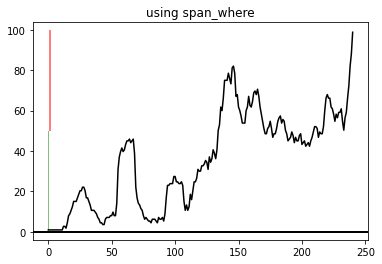

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


t = np.arange(0.0, 2, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = 1.2*np.sin(4*np.pi*t)


fig, ax = plt.subplots()
ax.set_title('using span_where')
ax.plot(polk.index.tolist(), polk['rolling_14_per'], color='black')
ax.axhline(0, color='black', lw=2)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=50, where=s1 > 0, facecolor='green', alpha=0.5)
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=50, ymax=100, where=s1 < 0, facecolor='red', alpha=0.5)
ax.add_collection(collection)


plt.show()

# New Section

In [ ]:
#oregon = get_state('Oregon', df)
#polk = get_county('Polk', oregon)

#polk = calc_daily_diff(polk)
#polk = polk.drop(labels=['state','cases','deaths','fips'], axis=1)

#pd.set_option('display.max_rows', oregon2.shape[0]+1)

#oregon2.set_index('date', inplace=True)

#oregon2.dtypes
#oregon2.info()

#oregon2.all


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: ignored

In [ ]:
polk.head()

,county,delta
date,,
2020-03-11,Polk,1
2020-03-12,Polk,0
2020-03-13,Polk,0
2020-03-14,Polk,0
2020-03-15,Polk,0


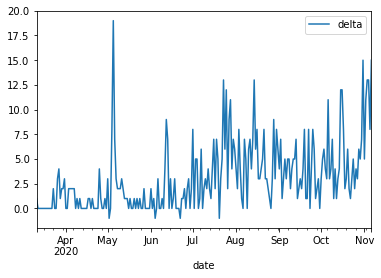

In [ ]:
polk.plot()

In [ ]:
counties = get_county_pops()

polk = pd.merge(polk, counties, on = 'county', how='outer')

polk.head()

,date,county,delta,population
0,2020-03-11,Polk,1.0,88200
1,2020-03-12,Polk,0.0,88200
2,2020-03-13,Polk,0.0,88200
3,2020-03-14,Polk,0.0,88200
4,2020-03-15,Polk,0.0,88200


In [ ]:
url2 = 'http://rob.axpr.net/oregoncounties.csv'
counties = pd.read_csv(url2, dtype={"CTYNAME": str})

counties["CTYNAME"] = counties["CTYNAME"].str.split(" ", n = 1, expand = True) 

counties = counties.drop(labels="GrowthRate", axis=1)

counties = counties.rename(columns={"CTYNAME": "county", "pop2020": "population"}, errors="raise")

counties.head()

#polk = oregon2.join(counties, on="county", how="left")

polk = pd.merge(oregon2, counties, 
                     on = 'county', 
                     how='outer')

polk.head()

,county,delta,population
0,Polk,1.0,88200
1,Polk,0.0,88200
2,Polk,0.0,88200
3,Polk,0.0,88200
4,Polk,0.0,88200
